# Reinforcement Learning

![](agent.png)

## Working Slot Machines via an Agent


![](multiarmedbandit.png)


![](redhat.jpg)


## Set up the simulation environment

![](slots.png)

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:

number_of_slot_machines = 5000
np.random.seed(100)
JPs = np.random.uniform(0,1, number_of_slot_machines)

## The Ground Truth

[0.54340494 0.27836939 0.42451759 ... 0.650803   0.86157973 0.10883903]


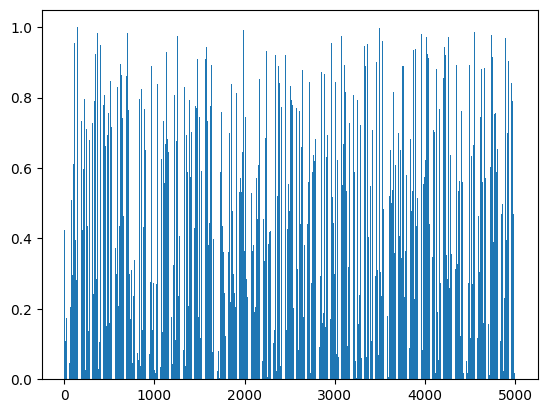

In [14]:
print(JPs)
plt.bar(np.arange(len(JPs)),JPs)
plt.show()

## What the Agent Knows at the Start

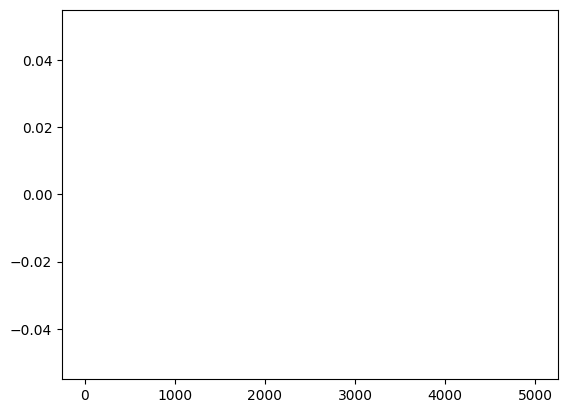

In [15]:
known_JPs = np.zeros(number_of_slot_machines)

plt.bar(np.arange(len(known_JPs)),known_JPs)
plt.show()


## Play a machine and test it N times

#### Define the function

In [16]:
def play_machine(slot_machine):
  x = np.random.uniform(0, 1)
  if (x <= JPs[slot_machine]):
    return(10)
  else:
    return(-1)

#### Test the machine

In [17]:
test_iterations = 10

# Test Slot Machine 4
print("Machine 4")
for machines in range(test_iterations):
  print(play_machine(3))
print ("-----------------------")      


# Test Slot Machine 5
print("Machine 5")
for machines in range(test_iterations):
  print(play_machine(4))

Machine 4
10
10
10
10
10
10
-1
10
10
10
-----------------------
Machine 5
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


# The Epsilon Greedy Algorithm

## Explore or Exploit : Greed vs Curiousity

The core dilemma the agent faces here is whether to prioritize greed, the desire to exploit a known resource, or curiosity, the desire to explore other slot machines in the hopes of a better chance of rewards. 

One of the simplest algorithms for solving this dilemma is known as the Epsilon Greedy algorithm, where the agent chooses at random between using the slot machine with the best odds of payout observed thus far, or trying out another machine in the hopes that it may provide a better payout. 

With a low value of Epsilon, this algorithm follows the greedy algorithm, but will occasionally try another slot machine. For instance, if the Epsilon value is .1, the algorithm will opt to exploit 90 percent of the time and explore only 10 percent of the time. Typically, default values of Epsilon tend to fall between .05 and .1. In short, the agent will primarily play the best slot machine discovered that it knows of and sometimes try a new machine. Remember that each pull of the lever comes at a cost and the agent doesn’t know what we know: that slot 4 pays out the best.




#### Define the Multi-Armed Bandit simulation function

In [18]:
def multi_armed_bandit(arms, iterations, epsilon):
  total_reward, optimal_action = [], []
  estimated_payout_odds = np.zeros(arms)
  count = np.zeros(arms)
  for i in range(0, iterations):
    epsilon_random = np.random.uniform(0, 1)
    if epsilon_random > epsilon :
      # exploit
      action = np.argmax(estimated_payout_odds)
    else :
      # explore
      action = np.random.choice(np.arange(arms))
    reward = play_machine(action)
    estimated_payout_odds[action] = estimated_payout_odds[action] + (1/(count[action]+1)) * (reward - estimated_payout_odds[action])
    total_reward.append(reward)
    optimal_action.append(action == np.argmax(estimated_payout_odds))
    count[action] += 1
  return(estimated_payout_odds, total_reward)

## Run the Simulation

#### First with an Epsilon of 10%

Actual Odds


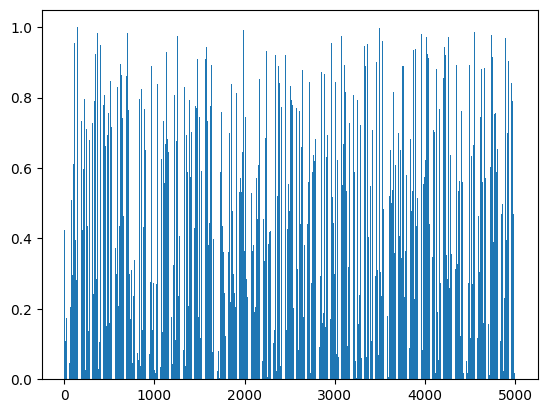

[0.54340494 0.27836939 0.42451759 ... 0.650803   0.86157973 0.10883903]
----------------------------------

----------------------------------
Learned Odds with epsilon of .1
----------------------------------


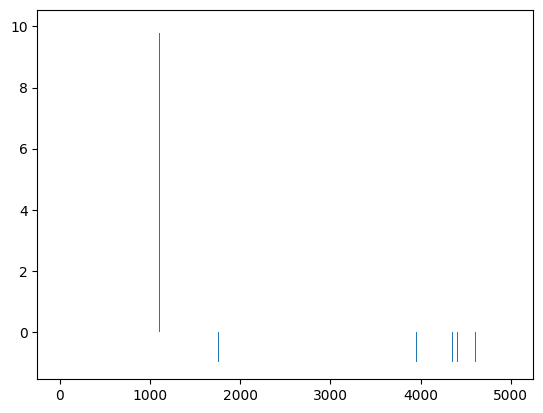

[ 6.15  0.    0.   ...  0.    0.   -1.  ]
Reward:  8713


In [19]:
print ("Actual Odds")
plt.bar(np.arange(len(JPs)),JPs)
plt.show()
print (JPs)
print("----------------------------------")
iterations = 1000
print("\n----------------------------------")
print ("Learned Odds with epsilon of .1")
print("----------------------------------")
learned_payout_odds, reward = multi_armed_bandit(number_of_slot_machines, iterations, .1)
plt.bar(np.arange(len(learned_payout_odds)),learned_payout_odds)
plt.show()
print (learned_payout_odds)
print ("Reward: ", sum(reward))

#### Then with 0%


----------------------------------
Learned Odds with epsilon of 0
----------------------------------


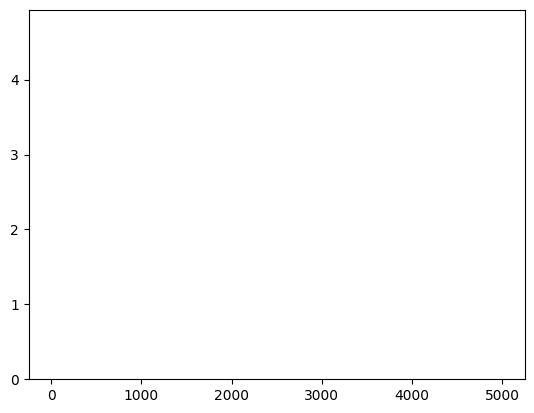

[4.698 0.    0.    ... 0.    0.    0.   ]
Reward:  4698


In [20]:
print("\n----------------------------------")
print ("Learned Odds with epsilon of 0")
print("----------------------------------")
learned_payout_odds, reward = multi_armed_bandit(number_of_slot_machines, iterations, 0)
plt.bar(np.arange(len(learned_payout_odds)),learned_payout_odds)
plt.show()
print (learned_payout_odds)
print ("Reward: ", sum(reward))

#### Now 100%


----------------------------------
Learned Odds with epsilon of 1
----------------------------------


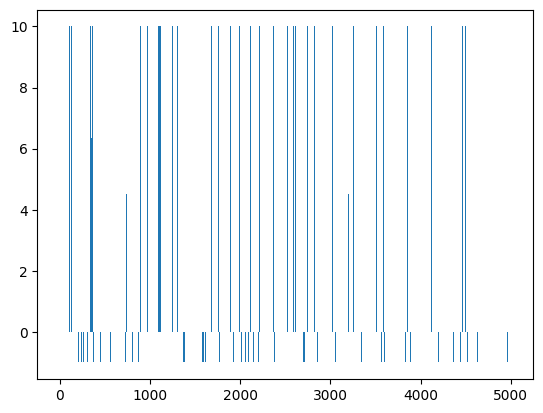

[ 0. -1.  0. ...  0.  0.  0.]
Reward:  4291


In [21]:
print("\n----------------------------------")
print ("Learned Odds with epsilon of 1")
print("----------------------------------")
learned_payout_odds, reward  = multi_armed_bandit(number_of_slot_machines, iterations, 1)
plt.bar(np.arange(len(learned_payout_odds)),learned_payout_odds)
plt.show()
print (learned_payout_odds)
print ("Reward: ", sum(reward))

# The Gordon Gecko Hypothesis

## Run a Hyperparameter Sweep of Epsilon Greedy from 0 to 1 


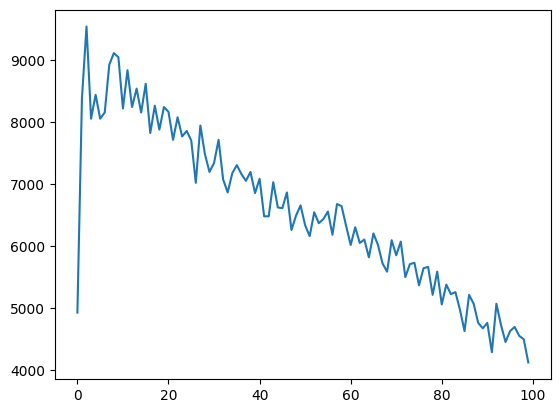

<Figure size 45000x1500 with 0 Axes>

In [22]:
winnings_list = []

for x in range(0, 100):
    
    greed_factor = x /100
    learned_payout_odds, reward  = multi_armed_bandit(number_of_slot_machines, iterations, greed_factor)
    
    winnings = sum(reward)
    
    
    # matplotlib.pyplot.figure(figsize=(float,float)) 


    winnings_list.append(winnings)
    
    #print(len(winnings_list)) 
    
plt.plot(np.arange(len(winnings_list)),winnings_list)
plt.figure(figsize=(450, 15))
plt.show()


